# One Command Line Plot 

author: Walter Xie

date: 6 May 2016

Simplify [ggplot2](http://docs.ggplot2.org/current/) codes into 
functions that can get a chart from one-line command.

Cancel the warning message to make the document look tidy. Please do not do this when you are running analysis.  

In [1]:
suppressMessages(library(ComMA))
#getwd()

Very basic graph for data visualization, such as bar chart, box plot, scatter plot, lines, etc.

## Bar chart

In [2]:
perf.df <- ComMA::readFile("../data-raw/model.test.txt")
perf.df[1:3,]
perf.df.mac <- perf.df[perf.df$OS=="Mac",]


Upload file : 4 columns excluding row names from column 1, 180 rows excluding column names from row 1, from file ../data-raw/model.test.txt 


,model,test,performance,OS
1,GTR,1044,1.144838,Mac
2,GTR,1366,1.081676,Mac
3,GTR,1510,1.078596,Mac


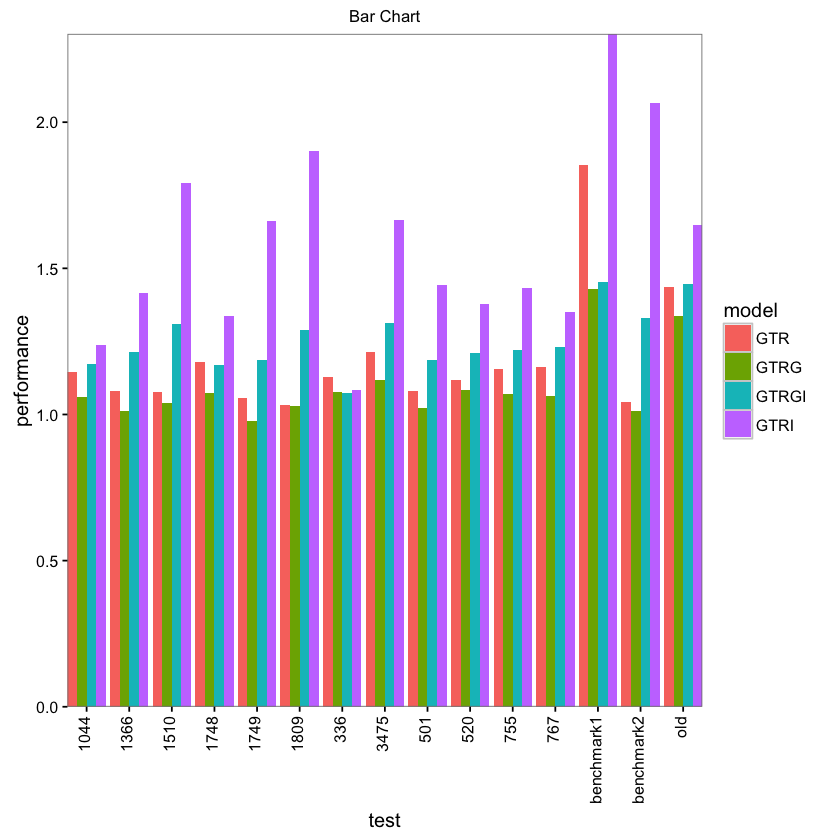

In [3]:
ggBarChart(perf.df.mac, x.id="test", y.id="performance", 
           fill.id="model", x.text.angle=90, verbose=F)

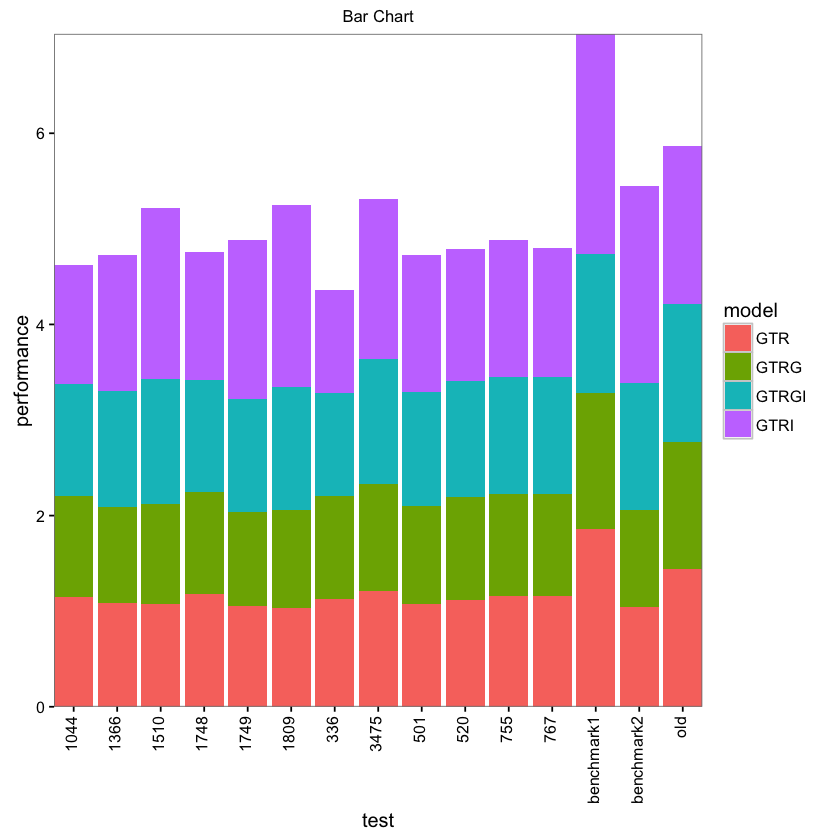

In [4]:
ggBarChart(perf.df.mac, x.id="test", y.id="performance", 
           fill.id="model", x.text.angle=90, 
           bar.pos="stack", verbose=F)

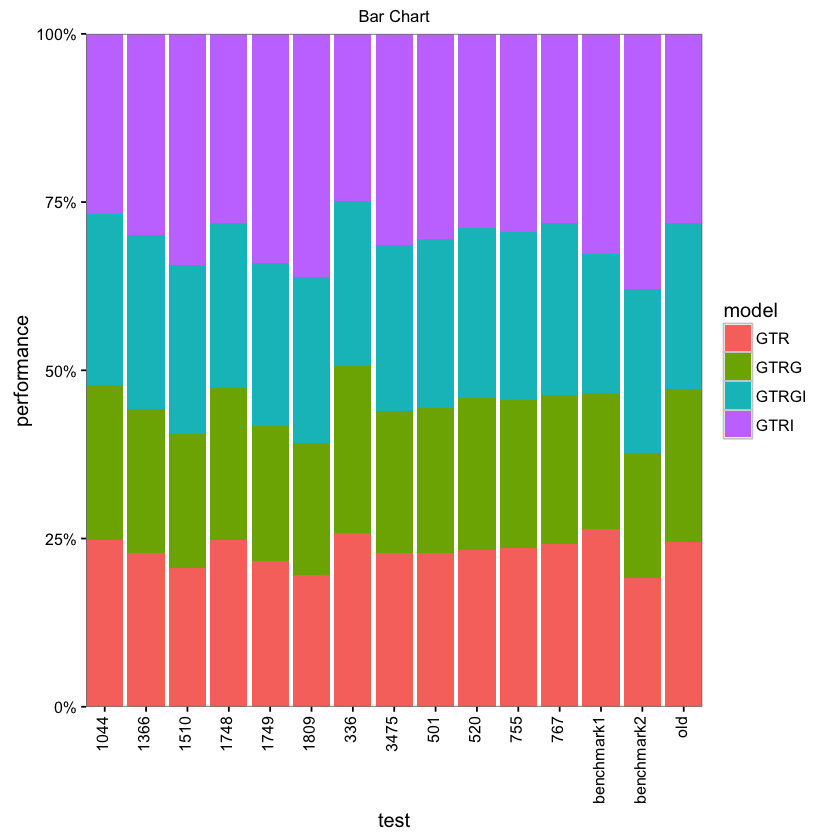

In [5]:
ggBarChart(perf.df.mac, x.id="test", y.id="performance", 
           fill.id="model", x.text.angle=90, 
           bar.pos="fill", y.trans="per", verbose=F)

## Advanced bar chart

In [6]:
data(reads.phyla)
reads.phyla[1:2,]

,16S,18S,trnL,ITS,COI,COI-spun,TaxaGroup
Actinobacteria,958,1,301,4,7,0,Bacteria
Aquificae,0,0,10,0,0,0,Bacteria


### Percentage bar

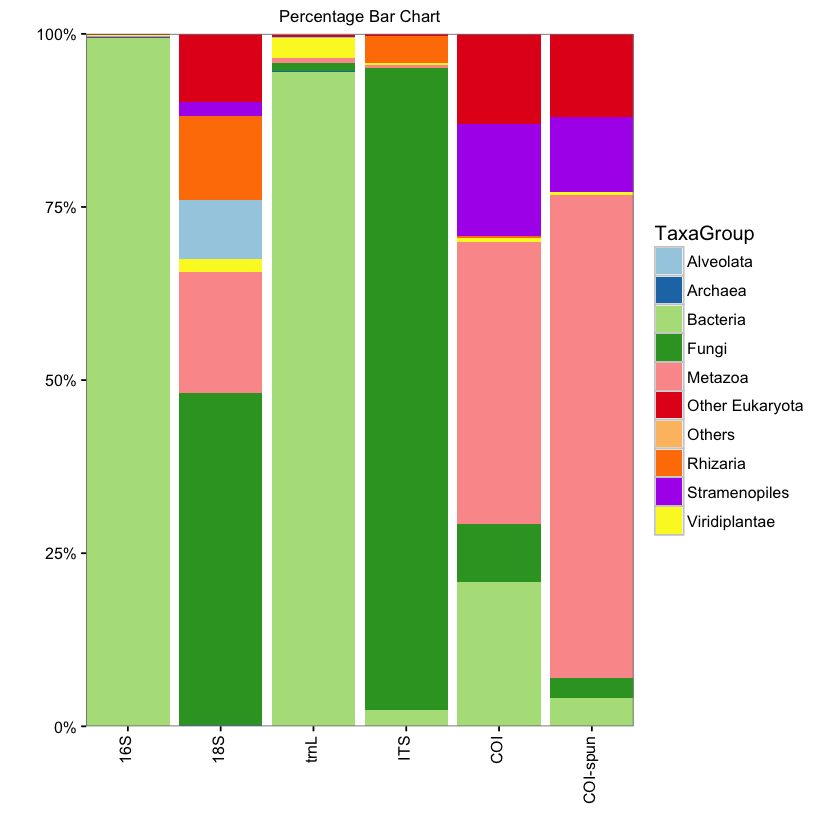

In [7]:
bar.chart <- ggPercentageBarChart(reads.phyla, melt.id="TaxaGroup", verbose=F)
bar.chart$gg.plot

### Group abundance bar

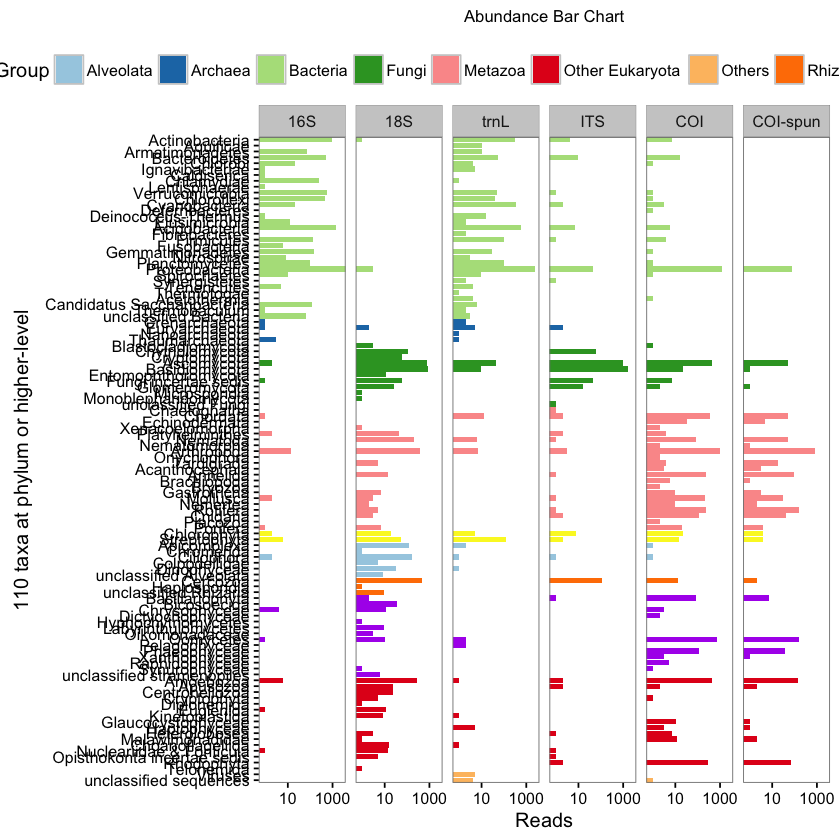

In [8]:
# add melt.id
reads.phyla$phylum <- rownames(reads.phyla)
abun.bar <- ggGroupAbundanceBar(reads.phyla, melt.id="phylum", 
                                colour.id="TaxaGroup", 
                                legend.row=1, verbose=F)
abun.bar$gg.plot
#pdf.ggplot(abun.bar$gg.plot, fig.path="abundance-bar.pdf", 
#           width=abun.bar$pdf.width, height=abun.bar$pdf.height)

## Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


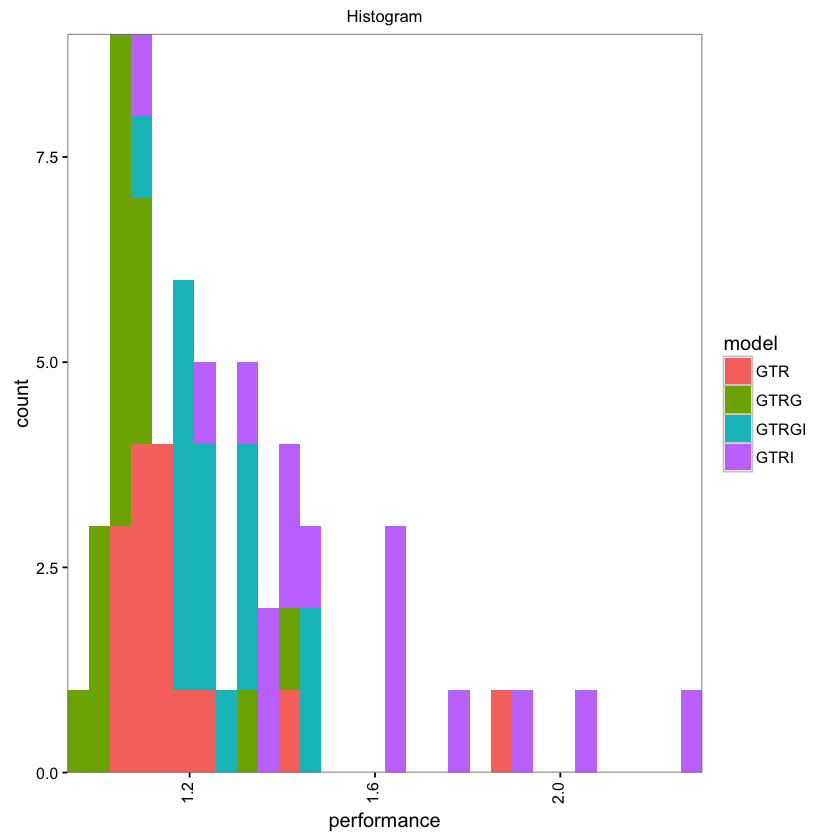

In [9]:
ggHistogram(perf.df.mac, x.id="performance", fill.id="model", 
            x.text.angle=90, verbose=F)

## Scatter plot

In [10]:
#random coordinates for 2 clusters
df.clusters <- random2Clusters()
df.clusters$labels <- rownames(df.clusters)
df.clusters[1:3,]

,x,y,group,labels
1,1.673964,2.437651,A,1
2,2.552462,1.928776,A,2
3,1.325056,4.163509,A,3


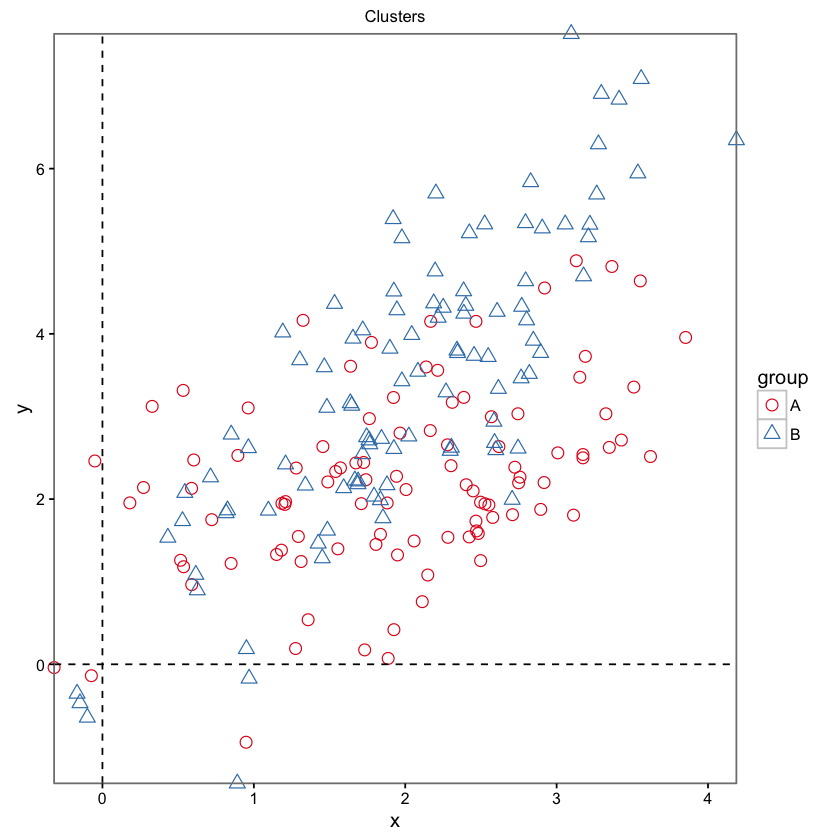

In [11]:
gg.plot <- ggScatterPlot(df.clusters, x.id="x", y.id="y", colour.id="group", 
                         shape.id="group", xintercept=0, yintercept=0, 
                         title="Clusters", palette="Set1", verbose=F)
# turns off clipping
g.table <- unclip.ggplot(gg.plot) 
plot(g.table)

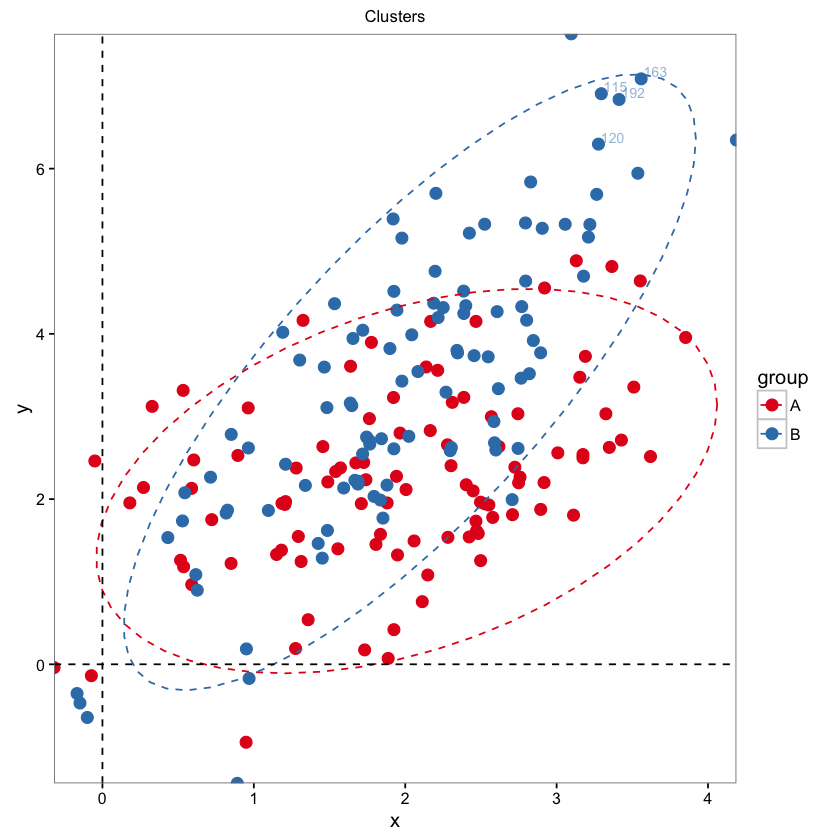

In [12]:
# selective labeling for points x > 3 and y > 6
ggScatterPlot(df.clusters, x.id="x", y.id="y", colour.id="group", 
              ellipsed.id="group", text.id="labels", 
              text.data=subset(df.clusters, x > 3 & y > 6), 
              xintercept=0, yintercept=0, title="Clusters", 
              palette="Set1", verbose=F)

## Advanced scatter plot

### nonmetric multidimensional scaling (NMDS)

### classical (metric) multidimensional scaling

### principal components analysis (PCA)

## Box Whiskers plot

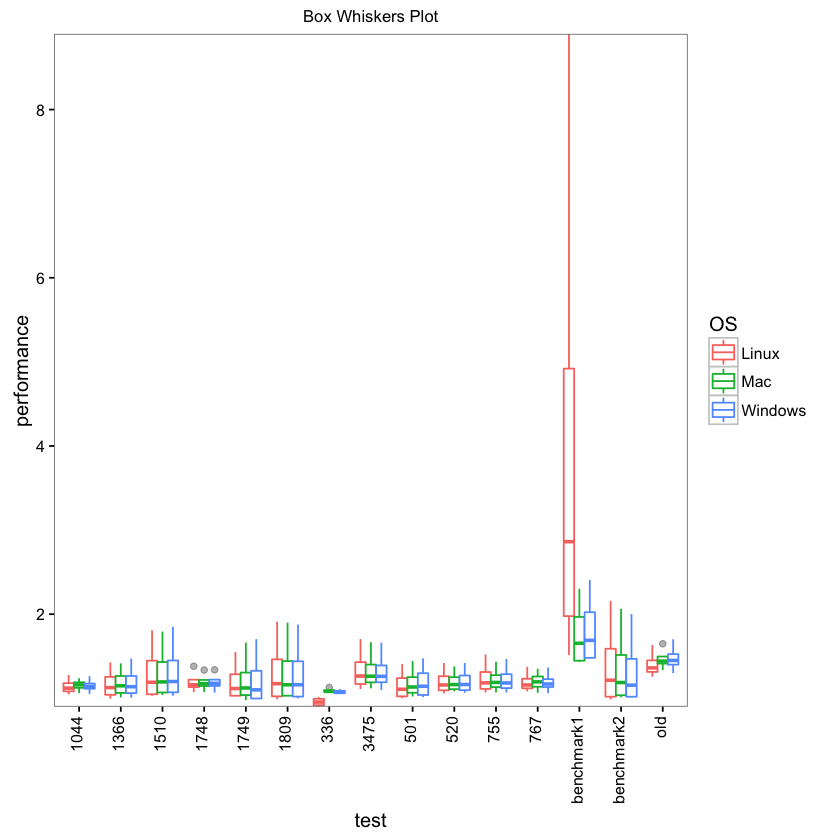

In [13]:
ggBoxWhiskersPlot(perf.df, x.id="test", y.id="performance", colour.id="OS", 
                  x.text.angle=90, verbose = F)

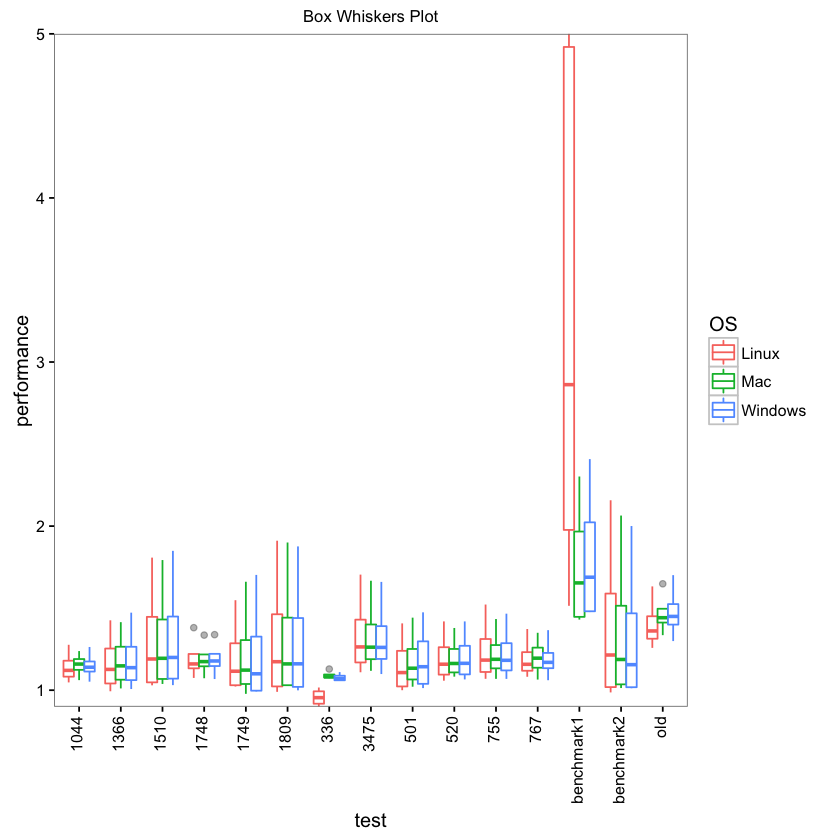

In [14]:
# Zoom the plot without change the underlying data
ggBoxWhiskersPlot(perf.df, x.id="test", y.id="performance", colour.id="OS", 
                  x.text.angle=90, y.lim.cart=c(NA,5), verbose = F)

## Line and points

In [15]:
mcmc.log <- readMCMCLog("../data-raw/star.beast.log")
mcmc.log$state <- as.double(rownames(mcmc.log))
names(mcmc.log)
# too much points, only use 99 rows from 2nd 
mcmc.log <- mcmc.log[2:100,c("TreeHeight.Species", "state")]
mcmc.log[1:3,]


Upload MCMC log : 18 parameters excluding row names from column 1, 2001 samples excluding column names from row 1, from file ../data-raw/star.beast.log 


[1] "posterior"                 "likelihood"               
 [3] "prior"                     "speciescoalescent"        
 [5] "birthRate.t:Species"       "YuleModel.t:Species"      
 [7] "TreeHeight.Species"        "TreeHeight.t:tree_0_1"    
 [9] "TreeHeight.t:tree_0_0"     "treeLikelihood.tree_0_1"  
[11] "treeLikelihood.tree_0_0"   "treePrior.t:tree_0_1"     
[13] "treePrior.t:tree_0_0"      "kappa.s:tree_0_0"         
[15] "freqParameter.s:tree_0_01" "freqParameter.s:tree_0_02"
[17] "freqParameter.s:tree_0_03" "freqParameter.s:tree_0_04"
[19] "state"

,TreeHeight.Species,state
25000,0.001377954,25000
50000,0.0005144839,50000
75000,0.002661132,75000


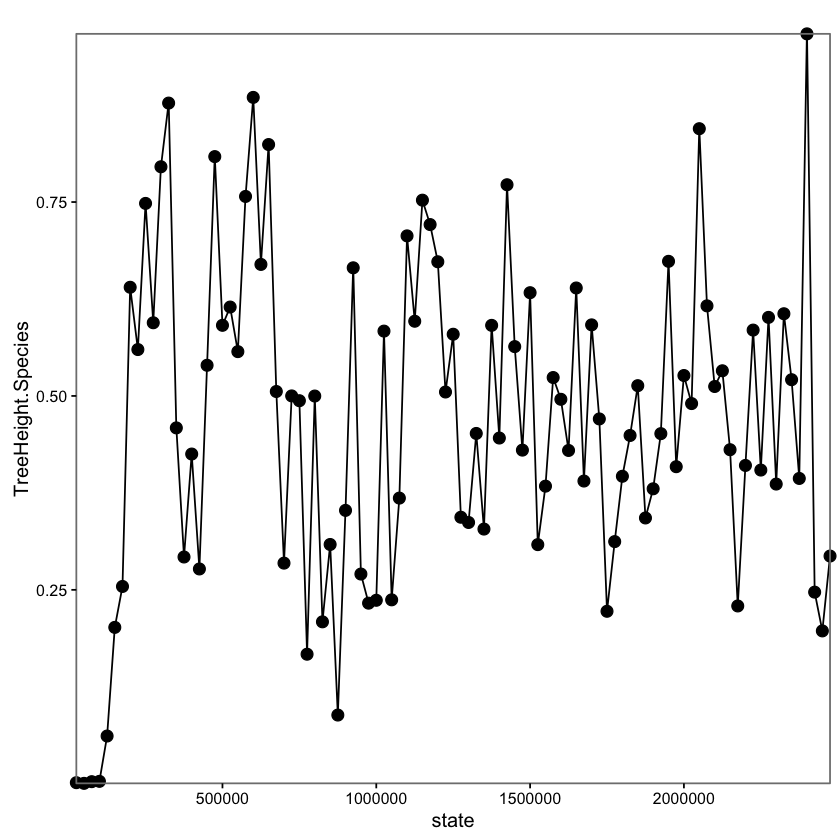

In [16]:
# line and points
gg.plot <- ggLineWithPoints(mcmc.log, x.id="state", 
                            y.id="TreeHeight.Species", verbose=F)
# turns off clipping
g.table <- unclip.ggplot(gg.plot) 
plot(g.table)

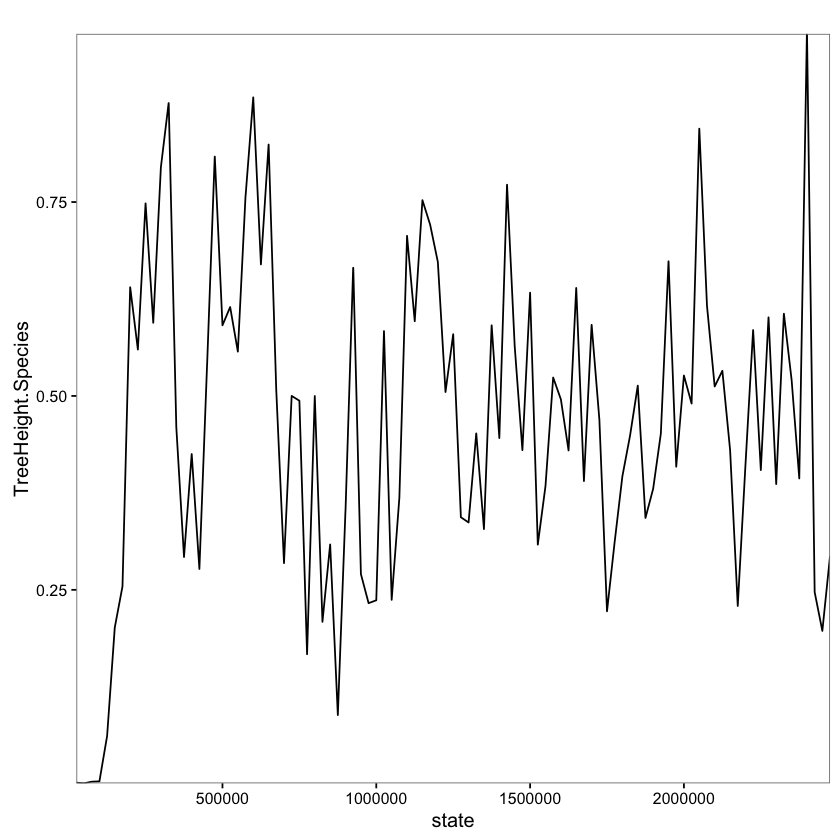

In [17]:
# only line
ggLineWithPoints(mcmc.log, x.id="state", y.id="TreeHeight.Species", 
                 line.or.point=1, verbose=F)

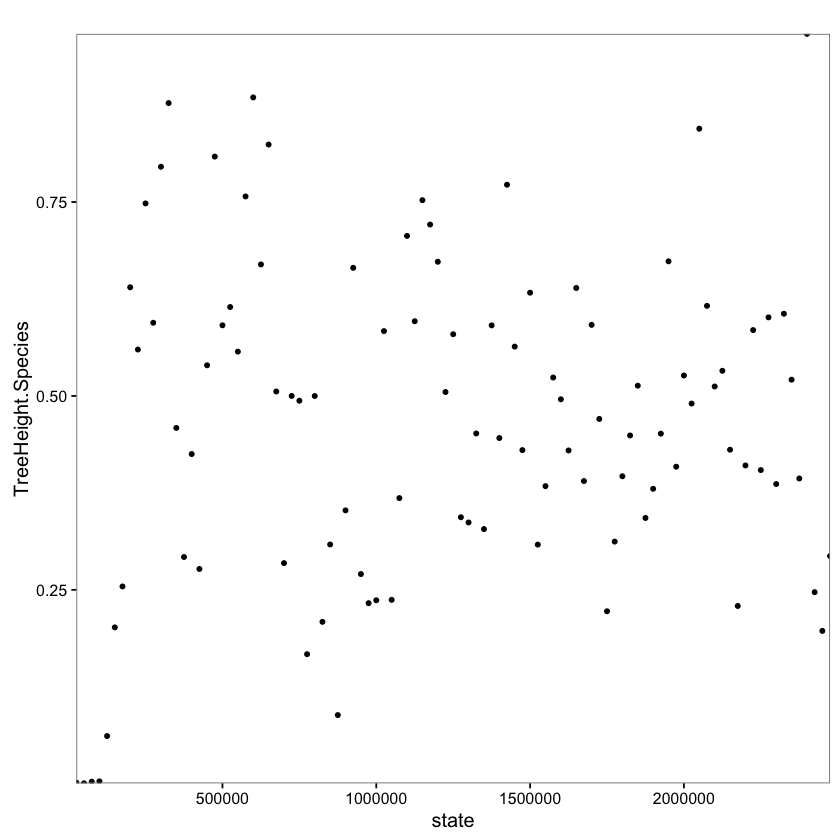

In [18]:
# only points
ggLineWithPoints(mcmc.log, x.id="state", y.id="TreeHeight.Species", 
                 line.or.point=2, point.size=1, verbose=F)

## Rarefaction curves for multi-sample

## Kernel density estimate (KDE)

In [19]:
b.log <- ComMA::readFile("../data-raw/star.beast.log", row.names=NULL)
df.melt <- melt(b.log, id="Sample")
# TreeHeight
df.TreeHeight <- df.melt[grep("TreeHeight", df.melt[,"variable"]),]


Upload file : 19 columns, 2001 rows excluding column names from row 1, from file ../data-raw/star.beast.log 


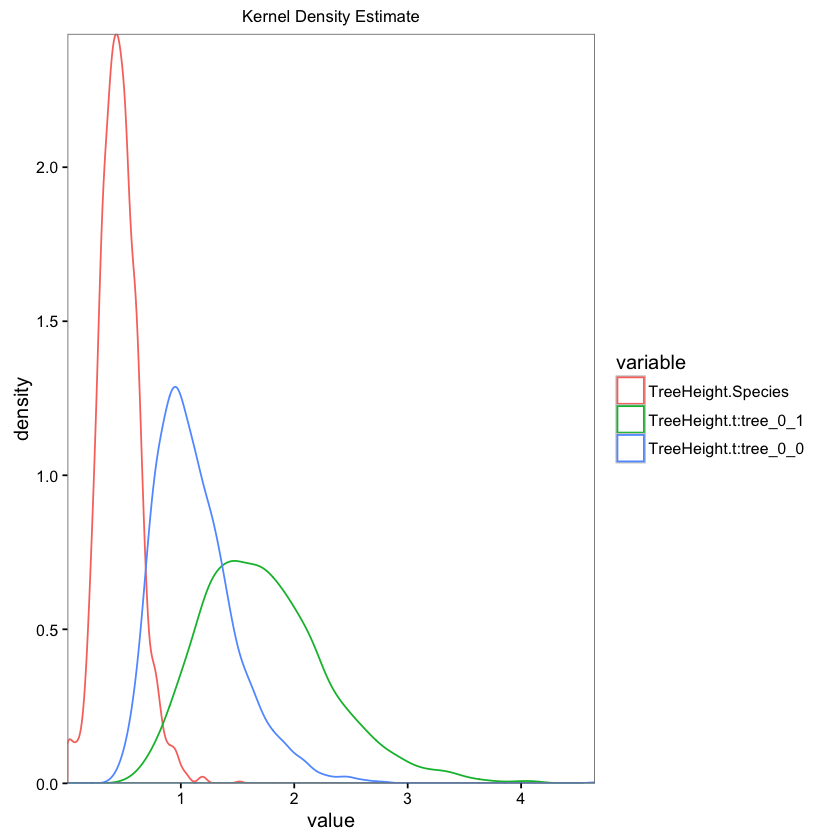

In [20]:
ggDensityEstimate(df.TreeHeight, x.id="value", colour.id="variable", verbose=F)

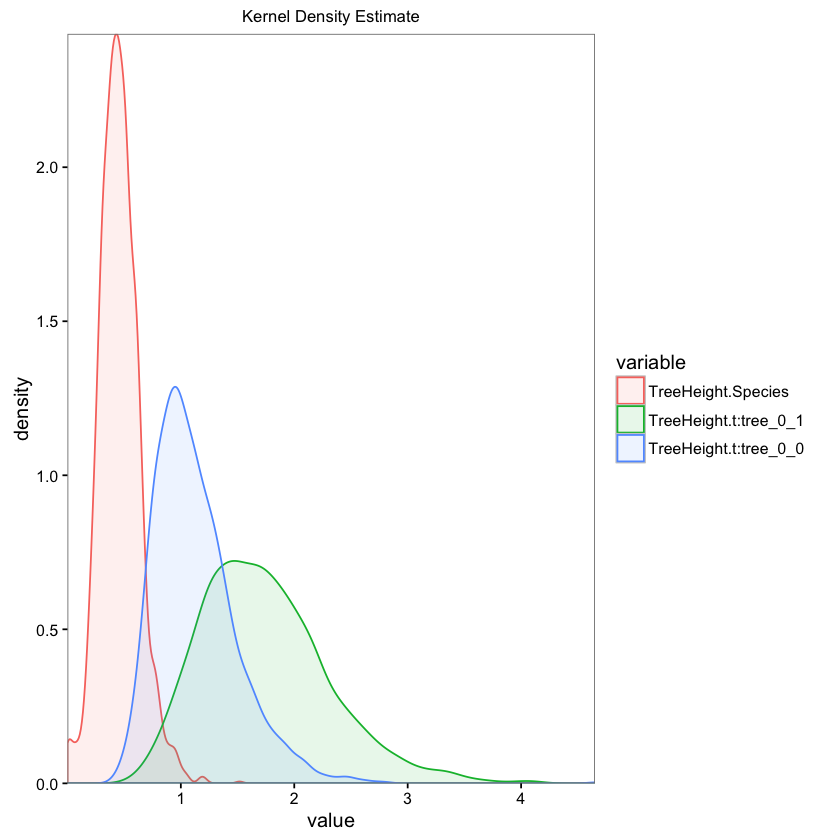

In [21]:
ggDensityEstimate(df.TreeHeight, x.id="value", fill.id="variable", 
                  colour.id="variable", verbose=F)

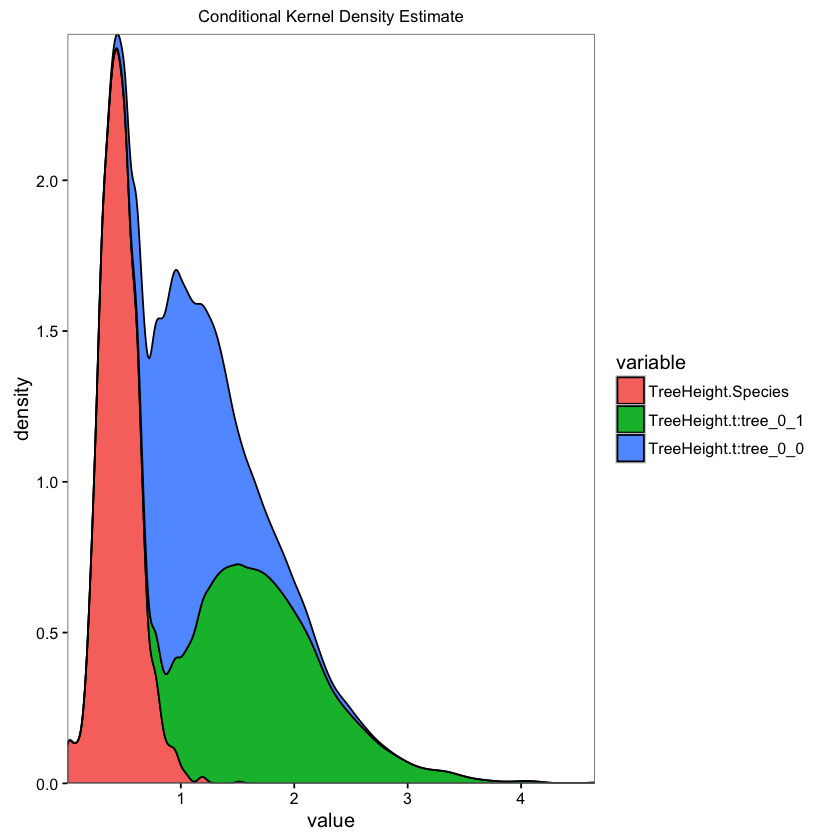

In [22]:
# stacked density plot to lose marginal densities
ggDensityEstimate(df.TreeHeight, x.id="value", fill.id="variable", 
                  density.pos="stack", density.alpha=1, verbose=F)

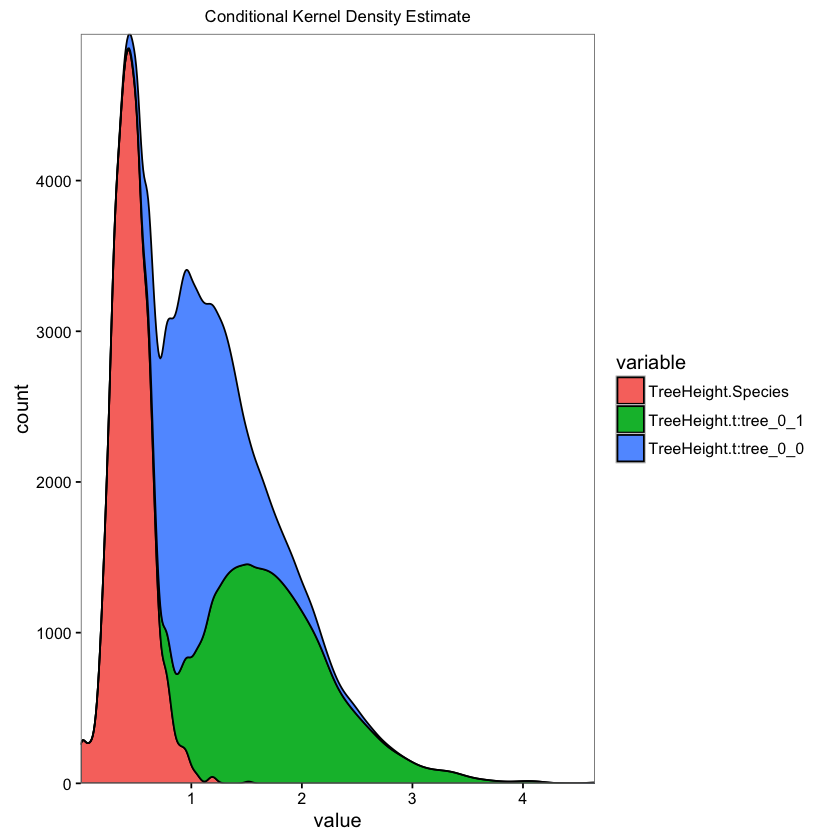

In [23]:
# conditional density plot to preserve marginal densities
ggDensityEstimate(df.TreeHeight, x.id="value", y.id="..count..", 
                  fill.id="variable", density.pos="stack", density.alpha=1, verbose=F)

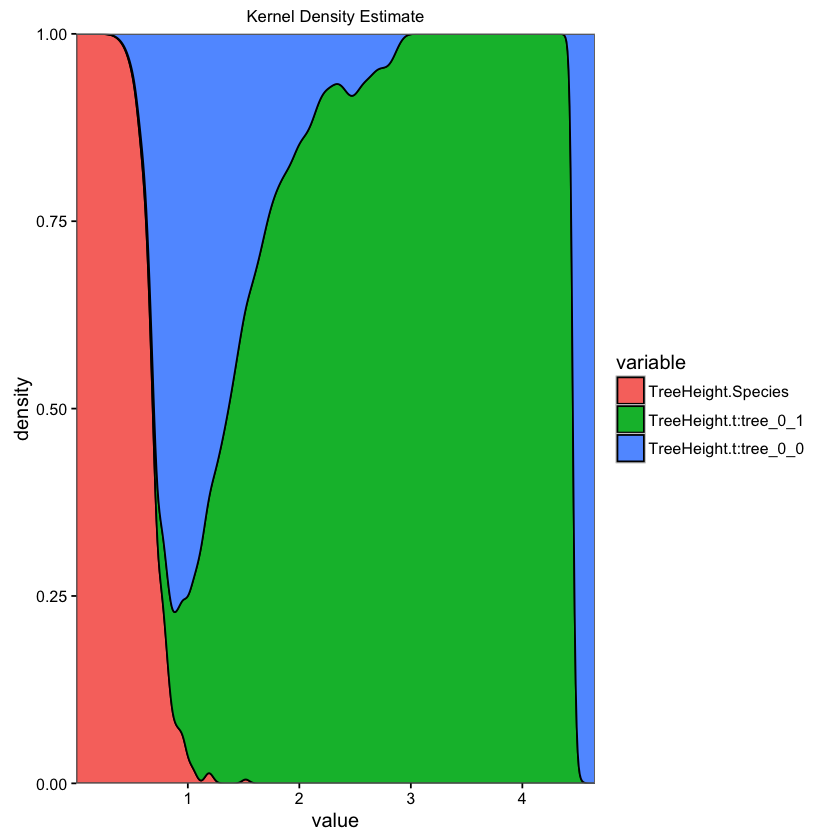

In [24]:
# percentage scale
ggDensityEstimate(df.TreeHeight, x.id="value", fill.id="variable", 
                  density.pos="fill", density.alpha=1, verbose=F)